In [5]:
from typing import List, Tuple

import numpy as np
import torch
import torchvision
from torch import nn
from torch.nn.functional import cross_entropy
from torch.optim import SGD
from torchvision.datasets import MNIST

In [21]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 6.6 MB/s eta 0:01:00
   ---------------------------------------- 0.6/390.3 MB 7.1 MB/s eta 0:00:55
   ---------------------------------------- 1.1/390.3 MB 8.8 MB/s eta 0:00:45
   ---------------------------------------- 1.7/390.3 MB 9.7 MB/s eta 0:00:41
   ---------------------------------------- 2.2/390.3 MB 10.2 MB/s eta 0:00:38
   ---------------------------------------- 2.8/390.3 MB 10.5 MB/s eta 0:00:37
   ---------------------------------------- 3.4/390.3 MB 10.8 MB/s eta 0:00:36
   ---------------------------------------- 3.9/390.3 MB 10.9 MB/s eta 0:00:36
   ---------------------------------------- 4.5/390.3 MB 11.0 MB/s eta 0:00:35
    --------------------------------------- 5.1/390.3 MB 11.2 MB/s eta

# Sieci neuronowe

## MNIST
Popularnym "prostym" datasetem, na którym można przetestować nasz model zanim zajmiemy się trudniejszymi problemami, jest MNIST, zbiór danych zawierających ręcznie rysowane cyfry. Poniżej kilka przykładowych cyfr:

<img width="400" src="https://miro.medium.com/proxy/0*At0wJRULTXvyA3EK.png" />


Zadanie naszego modelu polega na tym, by na podstawie obrazka narysowanej ręcznie cyfry określić, jaka to jest cyfra.

Czyli nasz model, widząc taki obrazek:
<img width="200" src="https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image-768x763.png" />

powinien odpowiedzieć, że to cyfra "7".


**Pytanie: Czy w takim sformułowaniu MNIST służy do regresji czy do klasyfikacji?**

## Praca na obrazkach
Nasze modele jak dotąd przyjmowały wyłącznie wektory - w jaki sposób możemy w takich modelach przetwarzać obrazki?

Obrazek to tak naprawdę trójwymiarowa tablica pikseli o wymiarach: `[H, W, C]`, gdzie `H` to wysokość, `W` to szerokość, a `C` to liczba kanałów (klasycznie: red, green, blue).

Najprostsze co możemy zrobić, to spłaszczyć naszą tablicę do jednego wymiaru, wektora o kształcie `[H * W * C]`. W przypadku MNIST-a nasze obrazki mają wymiar `28x28` pikseli i jest tylko jeden kanał (odcienie szarości), więc każdy z naszych wektorów będzie miał kształt `[28 * 28] = [784]`.

W przyszłości poznamy też sprytniejsze sposoby działania na obrazkach, np. za pomocą sieci konwolucyjnych.

## Stochastic gradient descent

Dotychczas kiedy chcieliśmy minimalizować funkcję kosztu $L(X; \theta)$ dla całego naszego zbioru $X \in \mathbb{R}^{NxD}$, liczyliśmy średni koszt dla wszystkich elementów $x \in X$, tzn. 

$$L(X; \theta) = \frac{1}{N} \sum_i L(x_i; \theta) $$

Następnie liczyliśmy gradient tego kosztu, żeby zminimalizować funkcję.

W praktyce może się okazać, że nasz dataset jest gigantyczny, np. kiedy mamy miliony przykładów. Niepraktyczne wtedy jest liczenie całego tego kosztu a tym bardziej gradientu. W praktyce w każdym kroku liczymy funkcję kosztu (i jej gradient) z innego podzbioru elementów w naszym zbiorze, czyli z tzw. **batcha**:

$$L_{\mathrm{batch}} (X;\theta) = \frac{1}{|B|} \sum_{x \in B} L(x; \theta) $$ 

Gradient po koszcie policzonym z batcha będzie inny niż gradient liczony po koszcie policzonym z całego zbioru, ale powinny być w miarę podobne, tzn:

$$ \nabla_\theta L_{\mathrm{batch}} (X; \theta) \approx \nabla_\theta L(X; \theta) $$

Metodę spadku gradientu zaimplementowaną w ten sposób (batchowo) nazywamy metodą **stochastycznego spadku gradientu** (*Stochastic Gradient Descent, SGD*). 


## Torchvision
PyTorch, a także pakiet `torchvision` udostępnia parę przydatnych narzędzi, z których skorzystamy na dzisiejszych zajęciach. Dla przykładu znacznie uproszczone jest pobieranie i ładowanie danych. W pakiecie [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html) znajdziemy popularne datasety, m.in. właśnie MNIST-a.

Oprócz tego z samego `torcha` możemy skorzystać z [`DataLoadera`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), który implementuje wiele przydatnych operacji do ładowania danych, np. dzielenie datasetu w batche i shufflowanie.

## Zadanie 1 (2 pkt.)
Klasa `MNIST` zwraca nam dane w postaci obiektów [PIL](https://pillow.readthedocs.io/en/stable/). Należy je odpowiednio przetworzyć, zanim będziemy mogli na nich pracować.

Za pomocą [`transformacji`](https://pytorch.org/vision/stable/transforms.html) podawanych do klasy MNIST należy:
1. Zamienić obiekty `PIL` na Tensory.
2. Policzyć średnią i odchylenie standardowe pikseli dla **całego zbioru trenującego** i użyć ich później do znormalizowania danych trenujących i testowych. Do liczenia średniej i odchylenia standardowego wykorzystać funkcję  `calculate_mean_and_std` (proszę zwrócić uwagę na to w jakim przedziale znajdują się dane przed normalizacją – chcemy aby były w przedziale 0-1). **HINT**: Tutaj torchvision powinien nam to ułatwić.
3. Zmienić "kształt" każdego przykładu z `28x28` na `784`.
    **HINT**: [`Lambda`](https://pytorch.org/vision/stable/generated/torchvision.transforms.Lambda.html)

Uwaga: proszę zwrócić uwagę co dokładnie robią używane_transformacje!

In [2]:
# from torchvision.transforms import ???


def calculate_mean_and_std() -> Tuple[float, float]:
    ...


mean, std = calculate_mean_and_std()

train_data = MNIST(
    root=".",
    download=True,
    train=True,
    # ???
)

test_data = MNIST(
    root=".",
    download=True,
    train=False,
    # ???
)

In [ ]:
def calculate_mean_and_std() -> Tuple[float, float]:
    dataset = MNIST(root=".", train=True, download=True, transform=ToTensor())
    
    # Stwórz tensor z wartościami pikseli ze wszystkich obrazów
    loader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    data = next(iter(loader))[0]  # Pobierz wszystkie obrazy w jednej partii
    
    # Policz średnią i odchylenie standardowe
    mean = data.mean().item()
    std = data.std().item()
    
    return mean, std

# Oblicz średnią i odchylenie standardowe
mean, std = calculate_mean_and_std()from torchvision.transforms import Compose, Normalize, Lambda

# Transformacje do przetwarzania obrazów
transform = Compose([
    ToTensor(),
    Normalize(mean=[mean], std=[std]),  # Normalizacja
    Lambda(lambda x: x.view(-1))  # Zmiana kształtu na (784,)
])

# Tworzenie zbioru treningowego z transformacjami
train_data = MNIST(
    root=".",
    download=True,
    train=True,
    transform=transform
)

# Tworzenie zbioru testowego z transformacjami
test_data = MNIST(
    root=".",
    download=True,
    train=False,
    transform=transform
)

In [3]:
mean, std = calculate_mean_and_std()
assert np.isclose(mean, 0.1306, atol=1e-4)
assert np.isclose(std, 0.3081, atol=1e-4)

In [4]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10)

x, y = next(iter(train_loader))
assert len(x.shape) == 2
assert x.shape == (10, 784)

# Sieci neuronowe

### Modele liniowe

Jak dotąd omawialiśmy wyłącznie modele liniowe, tzn. takie, które dla zadanego $x$ potrafiły modelować funkcję rodzaju $$f(x) = g(w^T x + b) $$
gdzie $x \in \mathbb{R}^D, w \in \mathbb{R}^D$, $b \in \mathbb{R}$ a $g$ to funkcja aktywacji, np. sigmoid.

Możemy też stworzyć podobny model, który na wyjściu nie będzie podawał jednej liczby, ale cały wektor o wymiarze $K$, tzn:
$$f(x) = g(W^T x + \mathbf{b}), $$
gdzie $W$ jest teraz macierzą a $\mathbf{b}$ wektorem, tzn. $W \in \mathbb{R}^{DxK}, \mathbf{b} \in \mathbb{R}^{K}$.

### Zanurzenia

Jeżeli chcieliśmy, żeby takie modele mogły zajmować się problemami nieliniowymi, musieliśmy znaleźć odpowiednią reprezentację danych (zanurzenia wielomianowe, kernele dla SVM-ów), które sprawi, że w nowej przestrzeni problem będzie liniowy. W tym celu trzeba "zgadnąć", jakie przekształcenie jest właściwe - co w przypadku bardziej skomplikowanych problemów jest niezwykle trudne. 

Ważne pytanie: **czy jesteśmy w stanie zbudować model, który znajdzie nam odpowiednią reprezentację dla danych?**

### Nakładanie warstw liniowych

**Rozwiązanie:** Nałóżmy na siebie kilka warstw modeli liniowych, np:
$$
f(x) = g_2(W_2^T (g_1(W_1^T x + \mathbf{b_1})) + \mathbf{b_2}),
$$
czyli, rozpisując czytelniej:
$$
f(x) = f^{(2)}(f^{(1)}(x)) \\
f^{(1)}(x) = g_1(W_1^T x + \mathbf{b_1}) \\ 
f^{(2)}(x) = g_2(W_2^T x + \mathbf{b_2})
$$

Powstały model nazywamy **sztuczną siecią neuronową** (*artificial neural network*).
 
Każdą funkcję $f^{(i)}$ nazywamy **warstwą** (*layer*). W naszej sieci możemy umieścić dowolnie wiele warstw, ale na razie będziemy zajmować się modelami nieszczególnie głębokimi (mniej niż 10 warstw).

Warstwy $f^{(i)}$ mogą implementować dowolną funkcję, ale jeśli mają postać $g(W^Tx +\mathbf{b})$, to nazywamy je warstwami liniowymi lub warstwami *fully connected*. Na tych zajęciach będziemy zajmować się wyłącznie sieciami o takiej postaci.


### Uczenie się reprezentacji

Jeśli nasz model jest postaci
$$
f(x) = f^{(n)}(f^{(n-1)}(\ldots f^{1}(x) \ldots )),
$$
to możemy przyjąć, że warstwa $f^{(n)}$ rozwiązuje problem liniowy na reprezentacji zadanej przez warstwy $f^{(1)}, f^{(2)}, \ldots, f^{(n-1)}$. 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" width=300 />  

Źródło: [Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network).

### Neurony

**Neuron** w tym kontekście to fragment warstwy, który łączy się ze wszystkimi neuronami w poprzedniej warstwie i na ich podstawie produkuje jedno z wyjść warstwy. 

Jeśli nasza warstwa ma postać $g(W^T x + \mathbf{b})$, to $i$-ty neuron implementuje funkcję:
$$ f(x) = g(w_i^T x + b_i), $$
gdzie wektor $w_i$ jest $i$-tą kolumną macierzy $W$ a $b_i$ jest $i$-tym elementem wektora $\mathbf{b}$.

## Zadanie 2 (3 pkt.)
Za pomocą przygotowanego przez TensorFlow [narzędzia do zabawy z sieciami neuronowymi](http://playground.tensorflow.org) proszę przeprowadzić poniższe eksperymenty i opisać rezultaty.

Kilka uwag:
* Każda odpowiedź powinna być zawarta w jednym/dwóch zdaniach. 
* Punktowane będą nie tylko prawidłowe odpowiedzi, ale też sensowne hipotezy/przypuszczenia.
* Jeżeli proszeni są Państwo o podanie architektury sieci, to najlepiej zapisać ją w skrótowe postaci `n_1-n_2-...-n_k`, gdzie `n_i` to liczba neuronów w `i`-tej warstwie. Czyli jeśli sieć ma pięć neuronów w pierwszej warstwie, trzy neurony w drugiej warstwie oraz sześć neuronów w trzeciej warstwie, to można ją opisać jako `5-3-6`.
* Proszę nie zmieniać opcji noise/ratio of training to test data. Proszę nie zmieniać feature'ów wejściowych, o ile nie będzie to wyraźnie podane w zadaniu.
* Można użyć opcji "show test data", żeby sprawdzić, dlaczego koszt na datasecie treningowym i testowym się różni.

1) **Eksperymenty na zbiorze Gaussian**
* Czy ten dataset można rozwiązać metodami płytkimi, których uczyliśmy się na wcześniejszych zajęciach?
* Co sprawia, że ten zbiór danych jest łatwiejszy niż pozostałe?
* Porównaj na tym zbiorze dwa modele: sieć neuronową z kilkoma warstwami i kilkudziesięcioma neuronami oraz sieć z jednym neuronem. Który z tych modeli bardziej nadaje się do zadania?

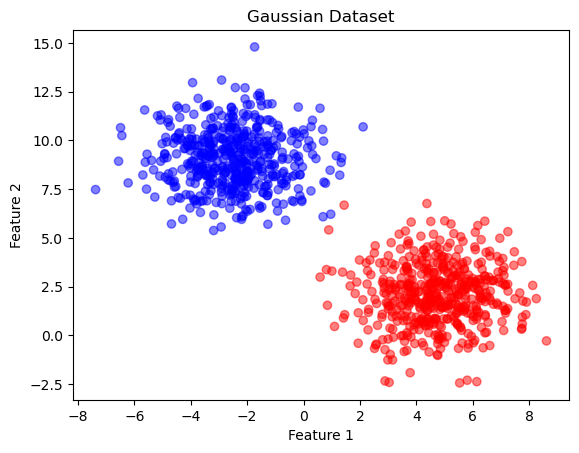

D:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0104 - loss: 0.9918 - val_accuracy: 0.0050 - val_loss: 0.9677
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0115 - loss: 0.9609 - val_accuracy: 0.0150 - val_loss: 0.9393
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0182 - loss: 0.9335 - val_accuracy: 0.0150 - val_loss: 0.9118
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0244 - loss: 0.8963 - val_accuracy: 0.0200 - val_loss: 0.8850
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0293 - loss: 0.8768 - val_accuracy: 0.0300 - val_loss: 0.8590
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0454 - loss: 0.8509 - val_accuracy: 0.0500 - val_loss: 0.8336
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0639 - loss: 0.8251 - val_accuracy: 0.0750 - val_loss: 0.8090
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1013 - loss: 0.7971 - val_accuracy: 0.1150 - val_loss:

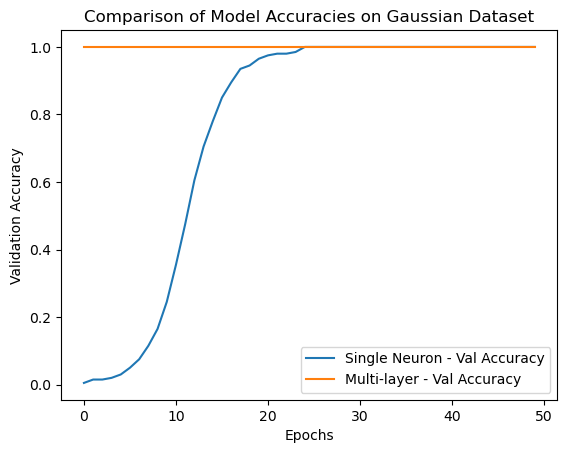

Single Neuron Model - Test Accuracy: 1.0000
Multi-layer Model - Test Accuracy: 1.0000


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generowanie prostego zbioru danych Gaussian
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=1.5)
y = y.reshape(-1, 1)

# Wizualizacja zbioru danych
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="bwr", alpha=0.5)
plt.title("Gaussian Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Model z jednym neuronem
model_single_neuron = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])

model_single_neuron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_single = model_single_neuron.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


model_multi_layer = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_multi_layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_multi = model_multi_layer.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


plt.plot(history_single.history['val_accuracy'], label="Single Neuron - Val Accuracy")
plt.plot(history_multi.history['val_accuracy'], label="Multi-layer - Val Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title("Comparison of Model Accuracies on Gaussian Dataset")
plt.show()


single_loss, single_acc = model_single_neuron.evaluate(X_test, y_test, verbose=0)
multi_loss, multi_acc = model_multi_layer.evaluate(X_test, y_test, verbose=0)

print(f"Single Neuron Model - Test Accuracy: {single_acc:.4f}")
print(f"Multi-layer Model - Test Accuracy: {multi_acc:.4f}")


2) **Eksperymenty na zbiorze Circle**
* Załóżmy, że mamy sieć z jednym neuronem. Ile najmniej potrzeba feature'ów wejściowych, żeby model osiągał na datasecie testowym koszt $\leq 0.001$? Jakie to feature'y?
* Załóżmy, że na wejściu mamy tylko niezanurzone feature'y (tzn. $x_1$ oraz $x_2$). Stwórz najmniejszą sieć neuronową (pod względem liczby neuronów), która osiąga na datasecie testowym koszt $\leq 0.001$. Opisz architekturę tej sieci. 
* Spróbuj rozwiązać ten problem za pomocą dowolnie dużej sieci neuronowej **z aktywacjami liniowymi** (nie zmieniając feature'ów wejściowych). Czy udało się osiągnąć wynik $\leq 0.001$? Jeśli tak, podaj architekturę sieci. Jeśli nie, podaj hipotezę, dlaczego się nie udało.

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generowanie zbioru danych Circle
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
y = y.reshape(-1, 1)

# Dodanie cech nieliniowych: x^2 i y^2
X_transformed = np.hstack([X, X[:, 0:1]**2, X[:, 1:2]**2])

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Model z jednym neuronem i dodatkowymi cechami x^2, y^2
model_single_neuron = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(4,))
])

model_single_neuron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_single = model_single_neuron.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Ocena na zbiorze testowym
single_loss, single_acc = model_single_neuron.evaluate(X_test, y_test, verbose=0)
print(f"Single Neuron Model with x, y, x^2, y^2 - Test Loss: {single_loss:.4f}")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5198 - loss: 0.6939 - val_accuracy: 0.5650 - val_loss: 0.6640
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5194 - loss: 0.6827 - val_accuracy: 0.5650 - val_loss: 0.6589
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5294 - loss: 0.6749 - val_accuracy: 0.5700 - val_loss: 0.6539
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5403 - loss: 0.6661 - val_accuracy: 0.5750 - val_loss: 0.6488
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5520 - loss: 0.6597 - val_accuracy: 0.5750 - val_loss: 0.6439
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5604 - loss: 0.6545 - val_accuracy: 0.5750 - val_loss: 0.6391
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5578 - loss: 0.6514 - val_accuracy: 0.5850 - val_loss: 0.6343
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.6443 - val_accuracy: 0.5850 - val_loss:

3) **Eksperymenty na zbiorze Spiral**
* Osiągnij (stabilny) koszt $\leq 0.1$ na zbiorze testowym, podaj wykorzystaną architekturę, rodzaj aktywacji, regularyzację  oraz learning rate.
* Co odróżnia rozwiązania które dobrze generalizują od rozwiązań, które overfitują pod względem wizualnym? Popatrz na płaszczyznę z danymi po wytrenowaniu modelu.

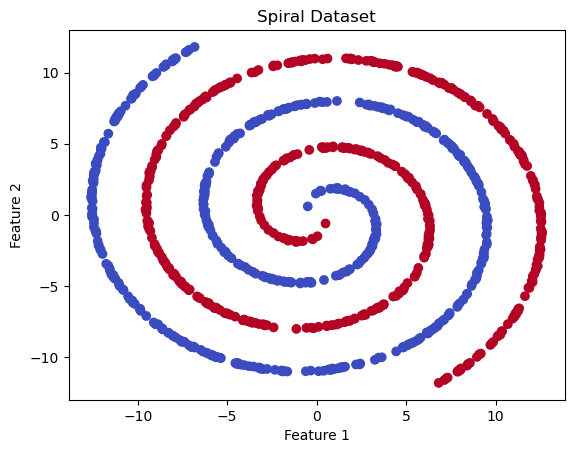

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def make_spirals(n_samples, noise=0.5):
    """
    Funkcja generująca spiralny zbiór danych.
    """
    n = np.sqrt(np.random.rand(n_samples // 2)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_samples // 2) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples // 2) * noise

    x0 = np.vstack((d1x, d1y)).T
    x1 = np.vstack((-d1x, -d1y)).T
    X = np.vstack((x0, x1))
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))

    return X, y

# Generowanie spiralnego zbioru danych
X, y = make_spirals(n_samples=1000, noise=0.1)
y = y.reshape(-1, 1)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wizualizacja danych
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Spiral Dataset")
plt.show()



## Zadanie 3 (2 pkt.)

Ręcznie zaimplementować prostą sieć z jedną warstwą ukrytą. Sieć:
1. Na wejściu będzie przyjmować dane o wymiarze `input_dim`
2. Pierwsza warstwa ma je przetwarzać na wymiar `hidden_dim`.
3. Druga warstwa ma przetwarzać wyjście pierwszej warstwy na wymiar `output_dim`.

W tym celu trzeba stworzyć odpowiednie tensory reprezentujące wagi i biasy w poszczególnych warstwach
1. Macierze wag należy zainicjalizować za pomocą wartości wylosowanych ze standardowego rozkładu normalnego. 
2. Dla obu warstw należy stworzyć _biasy_ zainicjalizowane na 0.
3. Funkcją aktywacji dla pierwszej warstwy ma być `torch.tanh`. W drugiej warstwie ma być aktywacja liniowa (czyli brak aktywacji).

Następnie należy zaimplementować pętlę uczenia z użyciem PyTorchowej funkcji kosztu `nn.CrossEntropyLoss` i optymalizatora SGD. Jeśli wszystko zostało zaimplementowane poprawne, to sieć powinna zazwyczaj osiagać accuracy większe niż `0.82` na zbiorze testowym (chociaż czasami może nie osiągać tej wartości z powodu pechowej inicjalizacji).

**HINT** Proszę nie zapomnieć o `requires_grad=True` przy definiowaniu parametrów sieci.

In [39]:
class CustomNetwork(object):
    """
    Simple 1-hidden layer linear neural network
    """

    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int):
        """
        Initialize network's weights
        """

        self.weight_1: torch.Tensor = ...
        self.bias_1: torch.Tensor = ...

        self.weight_2: torch.Tensor = ...
        self.bias_2: torch.Tensor = ...

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network
        """

        ...

    def parameters(self) -> List[torch.Tensor]:
        """
        Returns all trainable parameters
        """
        return [self.weight_1, self.bias_1, self.weight_2, self.bias_2]

In [41]:
def pytorch_backward(loss: torch.Tensor, model: CustomNetwork):
    loss.backward()

In [43]:
def train(model: CustomNetwork, epoch: int, batch_size: int, lr: float, momentum: float, backward_fn=pytorch_backward):

    # prepare data loaders, based on the already loaded datasets
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    # initialize the optimizer using the hyperparams
    optimizer: torch.optim.Optimizer = SGD(...)

    criterion = nn.CrossEntropyLoss()

    # training loop
    for e in range(epoch):
        for i, (x, y) in enumerate(train_loader):
            # reset the gradients from previouis iteration
            optimizer.zero_grad()
            # pass through the network
            output = ...  # type: torch.Tensor
            # calculate loss
            loss = criterion(...)  # type: torch.Tensor
            # backward pass thorught the network
            backward_fn(loss, model)
            # apply the gradients
            optimizer.step()

            # log the loss value
            if (i + 1) % 100 == 0:
                print(
                    f"Epoch {e} iter {i + 1}/{len(train_data) // batch_size} loss: {loss.item()}",
                    end="\r",
                )

        # at the end of an epoch run evaluation on the test set
        with torch.no_grad():
            # initialize the number of correct predictions
            correct: int = 0
            for i, (x, y) in enumerate(test_loader):
                # pass through the network
                output = ...  # type: torch.Tensor
                # update the number of correctly predicted examples
                correct += ...  # type: ignore

            print(f"\nTest accuracy: {correct / len(test_data)}")

In [45]:
# hyperparams
batch_size: int = 64
epoch: int = 3
lr: float = 0.01
momentum: float = 0.9

# initialize the model
model: CustomNetwork = ...  # type: ignore

correct = train(model, epoch, batch_size, lr, momentum)

# this is your test
assert (
    correct / len(test_data) > 0.82
), "Subject to random seed you should be able to get >82% accuracy"

NameError: name 'train_data' is not defined

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from typing import List

# Pobranie danych MNIST i przetworzenie ich na tensory
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizacja, aby dane były w przedziale [-1, 1]
])

train_data = datasets.MNIST(root=".", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root=".", train=False, download=True, transform=transform)

# Definicja modelu
class CustomNetwork:
    """
    Simple 1-hidden layer neural network
    """

    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int):
        # Inicjalizacja wag i biasów
        self.weight_1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
        self.bias_1 = torch.zeros(hidden_dim, requires_grad=True)
        self.weight_2 = torch.randn(hidden_dim, output_dim, requires_grad=True)
        self.bias_2 = torch.zeros(output_dim, requires_grad=True)

    def __call__(self, x: torch.Tensor) -> torch.Tensor:
        # Przejście przez warstwę ukrytą z aktywacją tanh
        hidden = torch.tanh(x @ self.weight_1 + self.bias_1)
        # Przejście przez warstwę wyjściową (liniowa aktywacja)
        output = hidden @ self.weight_2 + self.bias_2
        return output

    def parameters(self) -> List[torch.Tensor]:
        # Zwraca listę parametrów modelu
        return [self.weight_1, self.bias_1, self.weight_2, self.bias_2]


# Funkcja do przeprowadzenia backward pass
def pytorch_backward(loss: torch.Tensor, model: CustomNetwork):
    loss.backward()


# Funkcja treningowa
def train(model: CustomNetwork, epoch: int, batch_size: int, lr: float, momentum: float, backward_fn=pytorch_backward):
    # Przygotowanie zbiorów danych
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

    # Inicjalizacja optymalizatora
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    criterion = nn.CrossEntropyLoss()

    # Pętla uczenia
    for e in range(epoch):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()  # Zerowanie gradientów
            x = x.view(-1, 784)  # Przekształcenie obrazów 28x28 na wektory 784
            output = model(x)  # Przejście przez sieć
            loss = criterion(output, y)  # Obliczanie funkcji kosztu
            backward_fn(loss, model)  # Przeprowadzenie backward pass
            optimizer.step()  # Aktualizacja wag

            # Logowanie wartości funkcji kosztu
            if (i + 1) % 100 == 0:
                print(
                    f"Epoch {e+1}, iter {i+1}/{len(train_loader)}, loss: {loss.item():.4f}",
                    end="\r",
                )

        # Ewaluacja na zbiorze testowym
        with torch.no_grad():
            correct = 0
            for x, y in test_loader:
                x = x.view(-1, 784)  # Przekształcenie obrazów 28x28 na wektory 784
                output = model(x)
                predicted = torch.argmax(output, dim=1)
                correct += (predicted == y).sum().item()
            print(f"\nTest accuracy: {correct / len(test_data):.4f}")

    return correct


# Parametry treningu
batch_size = 64
epoch = 3
lr = 0.01
momentum = 0.9

# Inicjalizacja modelu
input_dim = 784  # Zakładamy, że dane mają wymiar 784 (28x28)
hidden_dim = 128
output_dim = 10
model = CustomNetwork(input_dim, hidden_dim, output_dim)

# Trening
correct = train(model, epoch, batch_size, lr, momentum)

# Test - czy osiągnięto accuracy > 82%
assert correct / len(test_data) > 0.82, "Model powinien osiągnąć accuracy > 82% na zbiorze testowym"


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.13MB/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 259kB/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:02<00:00, 602kB/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw

Epoch 1, iter 900/938, loss: 0.9154
Test accuracy: 0.7730
Epoch 2, iter 900/938, loss: 1.0706
Test accuracy: 0.8168
Epoch 3, iter 900/938, loss: 0.7523
Test accuracy: 0.8398


## Zadanie 4 (2 pkt.)

Ręcznie zaimplementować backward pass do sieci z poprzedniego zadania

In [ ]:
def my_manual_backward(loss: torch.Tensor, model: CustomNetwork):
    with torch.no_grad():
        # Note: CrossEntropyLoss = LogSoftmax + NLLLoss
        out_grad = torch.ones_like(loss)
        nll_grad_fn = loss.grad_fn
        log_softmax_grad_fn = nll_grad_fn.next_functions[0][0]

        add_grad_fn = log_softmax_grad_fn.next_functions[0][0]

        x_times_w2_grad_fn = add_grad_fn.next_functions[0][0]
        tanh_grad_fn = x_times_w2_grad_fn.next_functions[0][0]
        x_times_w1_grad_fn = tanh_grad_fn.next_functions[0][0].next_functions[0][0]

        nll_grad = ...

        log_softmax_grad = ...

        w2_times_x_grad, b2_grad = ...
        b2_grad = b2_grad.sum(0)

        x_grad, w2_grad = ...

        tanh_grad = ...

        w1_times_x_grad, b1_grad = ...
        b1_grad = b1_grad.sum(0)

        _, w1_grad = ...

        model.weight_1.grad = w1_grad
        model.bias_1.grad = b1_grad
        model.weight_2.grad = w2_grad
        model.bias_2.grad = b2_grad

In [ ]:
model: CustomNetwork = CustomNetwork(784, 64, 10)
(x, y) = next(iter(train_loader))
output = model(x)
loss = torch.nn.functional.cross_entropy(output, y)


my_manual_backward(loss, model)

w1g = model.weight_1.grad.clone().detach()
b1g = model.bias_1.grad.clone().detach()
w2g = model.weight_2.grad.clone().detach()
b2g = model.bias_2.grad.clone().detach()

model.weight_1.grad = None
model.bias_1.grad = None
model.weight_2.grad = None
model.bias_2.grad = None

loss.backward()

assert torch.allclose(w1g, model.weight_1.grad)
assert torch.allclose(b1g, model.bias_1.grad)
assert torch.allclose(w2g, model.weight_2.grad)
assert torch.allclose(b2g, model.bias_2.grad)

In [ ]:
# initialize the model
model: CustomNetwork = ...  # type: ignore

correct = train(model, epoch, batch_size, lr, momentum, backward_fn=my_manual_backward)

# this is your test
assert (
    correct / len(test_data) > 0.82
), "Subject to random seed you should be able to get >82% accuracy"

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim

# Parametry
input_dim = 10     # Wymiar wejściowy
hidden_dim = 5     # Wymiar warstwy ukrytej
output_dim = 3     # Wymiar wyjściowy
batch_size = 32    # Rozmiar partii
epochs = 100       # Liczba epok

# Zmienna do generowania przykładowych danych (losowe dane wejściowe i etykiety)
X_train = torch.randn(batch_size, input_dim)
y_train = torch.randint(0, output_dim, (batch_size,))

# Definicja sieci neuronowej z jedną warstwą ukrytą
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        # Warstwa 1: Wejście -> Warstwa ukryta
        self.W1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
        self.b1 = torch.zeros(1, hidden_dim, requires_grad=True)
        
        # Warstwa 2: Warstwa ukryta -> Wyjście
        self.W2 = torch.randn(hidden_dim, output_dim, requires_grad=True)
        self.b2 = torch.zeros(1, output_dim, requires_grad=True)
    
    def forward(self, x):
        # Przednia propagacja
        z1 = torch.matmul(x, self.W1) + self.b1
        a1 = torch.tanh(z1)  # Funkcja aktywacji dla pierwszej warstwy
        z2 = torch.matmul(a1, self.W2) + self.b2
        return z2  # Bez funkcji aktywacji w drugiej warstwie (liniowa)

# Inicjalizacja modelu
model = SimpleNN(input_dim, hidden_dim, output_dim)

# Funkcja kosztu
criterion = nn.CrossEntropyLoss()

# Optymalizator
optimizer = optim.SGD([model.W1, model.b1, model.W2, model.b2], lr=0.01)

# Trening
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Obliczanie straty
    loss = criterion(outputs, y_train)
    
    # Backward pass
    loss.backward()
    
    # Optymalizacja
    optimizer.step()
    
    # Zerowanie gradientów po optymalizacji
    optimizer.zero_grad()
    
    # Informacje o postępie
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Po zakończeniu treningu możemy ocenić dokładność na zbiorze testowym


Epoch 10/100, Loss: 1.6985396146774292
Epoch 20/100, Loss: 1.6493762731552124
Epoch 30/100, Loss: 1.6030336618423462
Epoch 40/100, Loss: 1.559349775314331
Epoch 50/100, Loss: 1.5181771516799927
Epoch 60/100, Loss: 1.479380488395691
Epoch 70/100, Loss: 1.442833662033081
Epoch 80/100, Loss: 1.4084184169769287
Epoch 90/100, Loss: 1.3760223388671875
Epoch 100/100, Loss: 1.3455373048782349
